In [ ]:
#Install packages
!pip install rasterio
!pip install rastertodataframe
!pip install pyproj
!pip install geopandas
!pip install osgeo

In [2]:
#Import Base Libraries
import pandas as pd
import numpy as np
import glob

#Import Raster Libraries
import rasterio
from rastertodataframe import raster_to_dataframe

#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from rasterio.plot import show

In [3]:
#Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Area Tiff Files

Read in Tiff files of area and merge.

In [4]:
#Create folder path and list variables
folder_path = '/content/drive/MyDrive/home_area_images'
file_list = glob.glob(folder_path + "/*.tiff")

#Read in first tiff layer and rename column
main_dataframe = raster_to_dataframe(file_list[0])
main_dataframe = main_dataframe.rename(columns={'Band_1': 'B1'})

#For loop to read rest of files and merge dataframe
for i in range(1, len(file_list)):
  data = raster_to_dataframe(file_list[i])
  data = data.rename(columns={'Band_1': f'B{i+1}'})
  main_dataframe = pd.concat([main_dataframe, data], axis = 1)

In [5]:
#View new dataframe
main_dataframe

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
0,0.2299,0.1426,0.0291,0.1250,0.1119,0.0440,0.0605,0.1679,0.1745,0.1738,0.0952,0.1855
1,0.2301,0.1410,0.0292,0.1240,0.1105,0.0419,0.0597,0.1669,0.1744,0.1728,0.0952,0.1856
2,0.2300,0.1396,0.0292,0.1230,0.1091,0.0400,0.0577,0.1665,0.1744,0.1720,0.0921,0.1858
3,0.2295,0.1393,0.0293,0.1224,0.1083,0.0385,0.0575,0.1647,0.1745,0.1717,0.0907,0.1865
4,0.2290,0.1396,0.0294,0.1224,0.1084,0.0397,0.0586,0.1651,0.1747,0.1720,0.0918,0.1866
...,...,...,...,...,...,...,...,...,...,...,...,...
7639,0.2001,0.1937,0.0273,0.1711,0.1011,0.0243,0.0478,0.2065,0.2272,0.2303,0.0482,0.1048
7640,0.1968,0.1933,0.0255,0.1708,0.0988,0.0287,0.0525,0.2250,0.2214,0.2315,0.0509,0.1034
7641,0.1893,0.1962,0.0239,0.1694,0.0968,0.0265,0.0530,0.2408,0.2161,0.2348,0.0466,0.1003
7642,0.1759,0.1983,0.0229,0.1693,0.0913,0.0244,0.0521,0.2307,0.2120,0.2349,0.0462,0.0932


## NARCAN Data

Upload the clipped and transformed NRCANN Data

Merge with main_dataframe

In [6]:
#Path for raster data from NRCAN
data_path = '/content/drive/MyDrive/raw_data.tif'

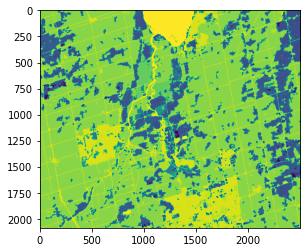

In [7]:
#Open data with rasterio
img = rasterio.open(data_path)
show(img, 0)

In [8]:
#Read the image
array = img.read()

#Create numpy array
array = np.array(array)

#Check shape
array.shape

(1, 2087, 2500)

In [9]:
#Read NRCAN raster to dataframe
nrcann = raster_to_dataframe(data_path)
nrcann.head()

,Band_1
0,15
1,15
2,15
3,15
4,15


In [10]:
#Rename column
nrcann = nrcann.rename(columns={'Band_1':'Class'})

#Print sum of classification types
print('Number of NRCANN Classes: ', nrcann.Class.nunique())

#Check which classifications are listed
print(nrcann.Class.value_counts())

Number of NRCANN Classes:  10
15    3064311
17     654933
5      621059
6      279479
18     177847
16     113585
14     105606
8       99113
10      57765
1       43802
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Land Cover Density')

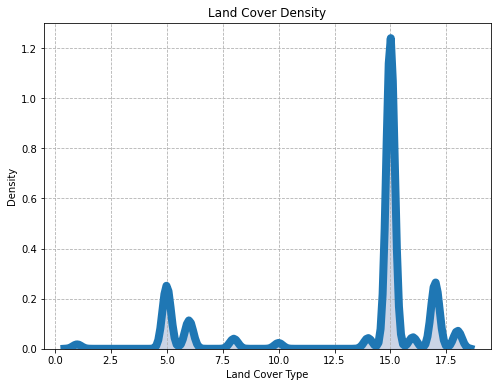

In [11]:
#Plot Class distribution
plt.figure(figsize=[8,6])
plt.grid(linestyle='--')
dp = sns.distplot(nrcann.Class, hist=False, kde_kws=dict(linewidth=8))
l1 = dp.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
dp.fill_between(x1,y1, color="#5471ab", alpha=0.3)
dp.set_xlabel("Land Cover Type")
dp.set_title("Land Cover Density")

In [12]:
#Merge nrcann with main_dataframe
data = pd.concat([main_dataframe, nrcann], axis=1)
data.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,Class
0,0.2299,0.1426,0.0291,0.1250,0.1119,0.0440,0.0605,0.1679,0.1745,0.1738,0.0952,0.1855,15
1,0.2301,0.1410,0.0292,0.1240,0.1105,0.0419,0.0597,0.1669,0.1744,0.1728,0.0952,0.1856,15
2,0.2300,0.1396,0.0292,0.1230,0.1091,0.0400,0.0577,0.1665,0.1744,0.1720,0.0921,0.1858,15
3,0.2295,0.1393,0.0293,0.1224,0.1083,0.0385,0.0575,0.1647,0.1745,0.1717,0.0907,0.1865,15
4,0.2290,0.1396,0.0294,0.1224,0.1084,0.0397,0.0586,0.1651,0.1747,0.1720,0.0918,0.1866,15


In [13]:
#Save merged data
data.to_csv('/content/drive/MyDrive/land_class_data.csv')